In [1]:
pip install opencv-contrib-python

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


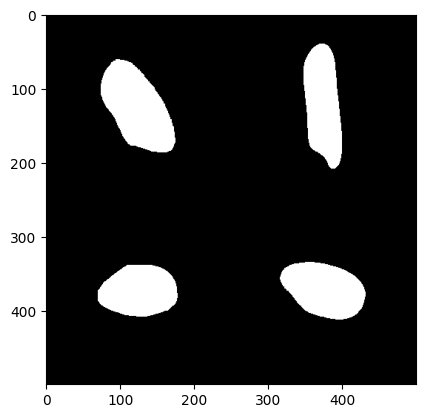

In [ ]:
# Import the cv2 library
import cv2
import matplotlib.pyplot as plt
# Read the image you want connected components of
img_raw = cv2.imread('/content/drive/MyDrive/MAESTRIA_CCDD/DM_CYT/tp_1/random_sample_rice_images/Arborio (3).jpg')
img_raw2 = cv2.imread('/content/drive/MyDrive/MAESTRIA_CCDD/DM_CYT/tp_1/random_sample_rice_images/basmati (343).jpg')
img_raw3 = cv2.imread('/content/drive/MyDrive/MAESTRIA_CCDD/DM_CYT/tp_1/random_sample_rice_images/Karacadag (14996).jpg')
img_raw4 = cv2.imread('/content/drive/MyDrive/MAESTRIA_CCDD/DM_CYT/tp_1/random_sample_rice_images/Karacadag (12663).jpg')

img = cv2.vconcat([cv2.hconcat([img_raw,img_raw2]),cv2.hconcat([img_raw3,img_raw4])])


# A binario

#skimage lib alternativa


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_binario = cv2.threshold(gray, 0, 255,
	cv2.THRESH_BINARY| cv2.THRESH_OTSU)[1]



plt.imshow(img_binario, cmap = "gray")
# You need to choose 4 or 8 for connectivity type
# Connectivity = 8 contempla vecinos cercanos en diagonal, vecindad "en diamante", vs 4, vecindad "cuadrada"
connectivity = 4
# Perform the operation
output = cv2.connectedComponentsWithStats(img_binario, connectivity, cv2.CV_32S)
# Get the results
# The first cell is the number of labels
numLabels = output[0]
# The second cell is the label matrix
labels = output[1]
# The third cell is the stat matrix
stats = output[2]
# The fourth cell is the centroid matrix
centroids = output[3]

In [ ]:
print(f'Cantidad de objetos:  {numLabels}')

Cantidad de objetos:  5


[INFO] examining component 2/5


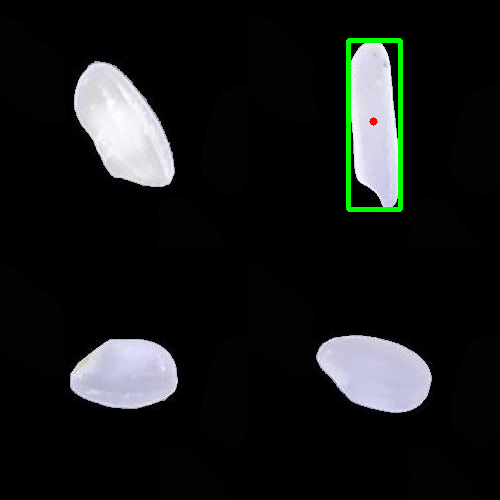

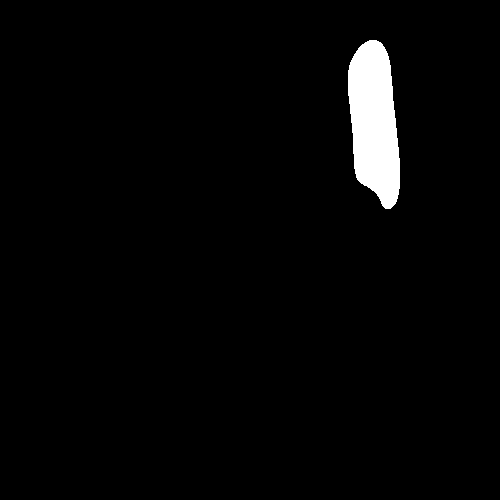

[INFO] examining component 3/5


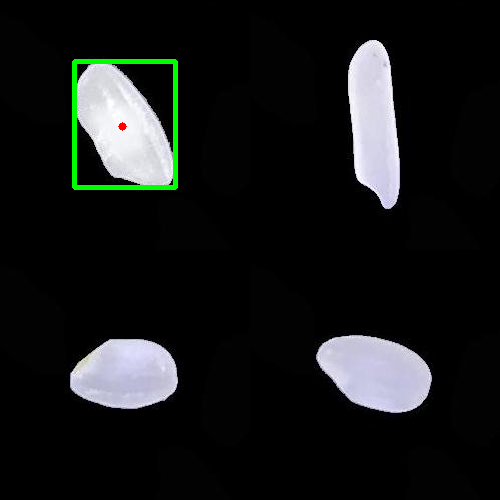

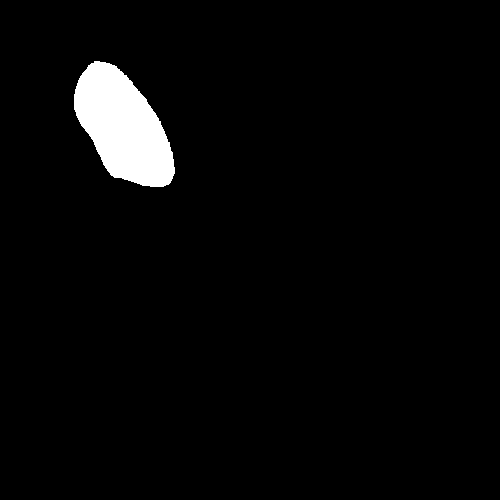

[INFO] examining component 4/5


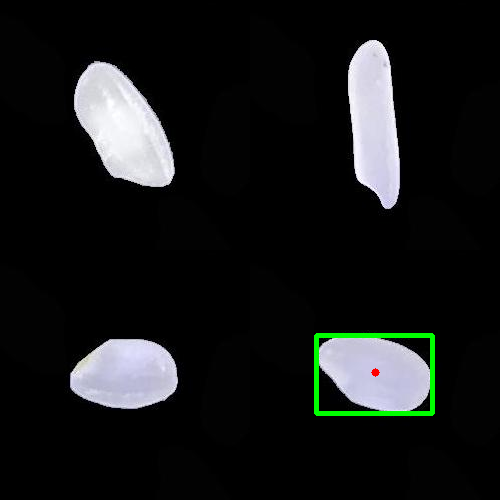

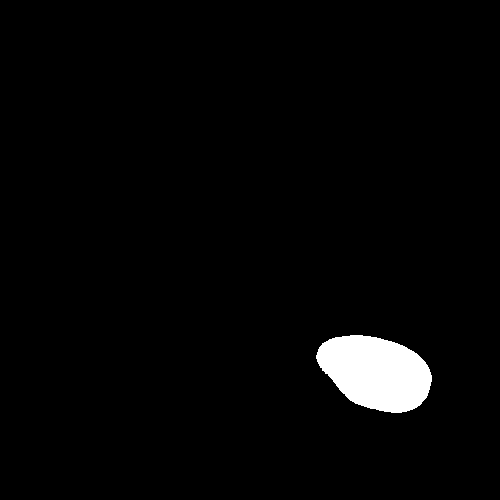

[INFO] examining component 5/5


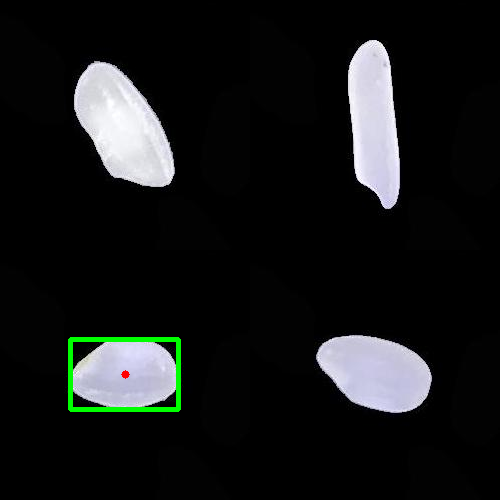

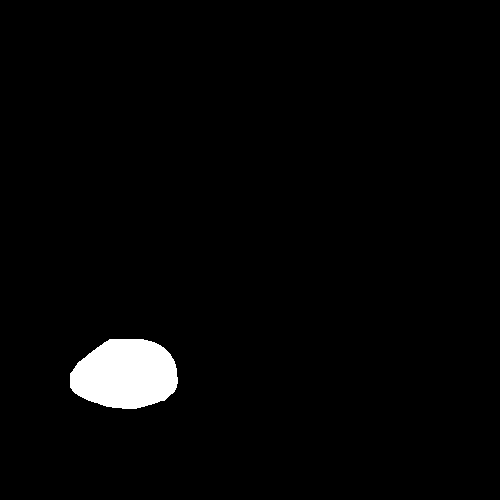

In [ ]:
from google.colab.patches import cv2_imshow

for i in range(0, numLabels):
	# if this is the first component then we examine the
	# *background* (typically we would just ignore this
	# component in our loop)
  if i == 0:
    text = "examining component {}/{} (background)".format(i + 1, numLabels)
# otherwise, we are examining an actual connected component
  else:
    text = "examining component {}/{}".format( i + 1, numLabels)
	# print a status message update for the current connected
	# component
    print("[INFO] {}".format(text))
	# extract the connected component statistics and centroid for
	# the current label
    x = stats[i, cv2.CC_STAT_LEFT]
    y = stats[i, cv2.CC_STAT_TOP]
    w = stats[i, cv2.CC_STAT_WIDTH]
    h = stats[i, cv2.CC_STAT_HEIGHT]
    area = stats[i, cv2.CC_STAT_AREA]
    (cX, cY) = centroids[i]
    output = img.copy()
    cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 3)
    cv2.circle(output, (int(cX), int(cY)), 4, (0, 0, 255), -1)
    componentMask = (labels == i).astype("uint8") * 255


	# show our output image and connected component mask
    cv2_imshow(output)
    cv2_imshow(componentMask)
    cv2.waitKey(0)

    cv2.imwrite(f'/content/drive/MyDrive/MAESTRIA_CCDD/DM_CYT/tp_1/ccl_bbox_centroid_{i}.jpg', output)
    cv2.imwrite(f'/content/drive/MyDrive/MAESTRIA_CCDD/DM_CYT/tp_1/ccl_objeto_{i}.jpg', componentMask)

CLUSTERING ESPECTRAL

In [ ]:
# Convertimos img a un grafo

from sklearn.feature_extraction import image

mask = img_binario.astype(bool)

img = img_binario.astype(float)

graph = image.img_to_graph(img, mask=mask)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


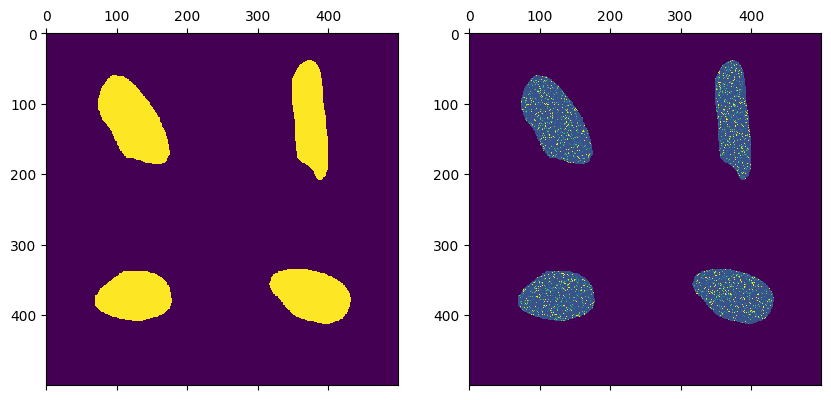

In [ ]:
from sklearn.cluster import spectral_clustering
import numpy as np

labels = spectral_clustering(graph, n_clusters=4, eigen_solver="arpack")
label_im = np.full(mask.shape, -1.0)
label_im[mask] = labels

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].matshow(img)
axs[1].matshow(label_im)



COMO SE VE, CUANDO LA IMAGEN TIENE OBJETOS CLARAMENTE DIFERENCIABLES (NO CONECTADOS) CCL FUNCIONA MUCHO MEJOR QUE CLUST. ESPECTRAL. PROBEMOS OTRO CASO!

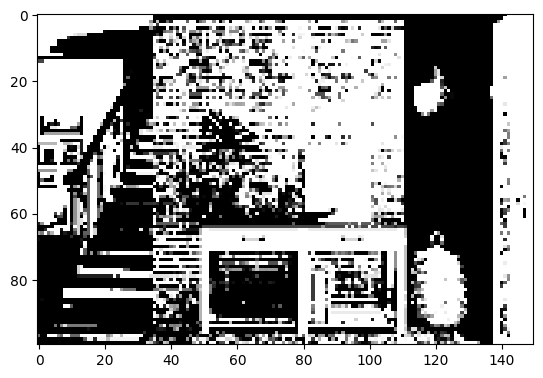

In [ ]:
# Read the image you want connected components of
img = cv2.imread('/content/drive/MyDrive/MAESTRIA_CCDD/DM_CYT/tp_1/living.jpg')

# A binario

#skimage lib alternativa


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_binario = cv2.threshold(gray, 40, 255,
	cv2.THRESH_BINARY| cv2.THRESH_OTSU)[1]

# reduzco tamaño
down_width = 150
down_height = 100
down_points = (down_width, down_height)
img_binario = cv2.resize(img_binario, down_points, interpolation= cv2.INTER_LINEAR)

plt.imshow(img_binario, cmap = "gray")
# You need to choose 4 or 8 for connectivity type
# Connectivity = 8 contempla vecinos cercanos en diagonal, vecindad "en diamante", vs 4, vecindad "cuadrada"
connectivity = 4
# Perform the operation
output = cv2.connectedComponentsWithStats(img_binario, connectivity, cv2.CV_32S)
# Get the results
# The first cell is the number of labels
numLabels = output[0]
# The second cell is the label matrix
labels = output[1]
# The third cell is the stat matrix
stats = output[2]
# The fourth cell is the centroid matrix
centroids = output[3]

In [ ]:
print(f'Cantidad de objetos:  {numLabels}')

Cantidad de objetos:  49


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


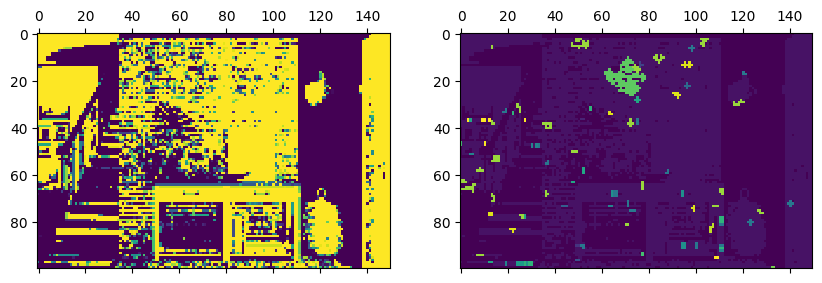

In [ ]:
### HAY DEMASIADOS OBJETOS! PROBAMOS C.ESPECTRAL

mask = img_binario.astype(bool)

img = img_binario.astype(float)

graph = image.img_to_graph(img, mask=mask)

labels = spectral_clustering(graph, n_clusters=10, eigen_solver="arpack")
label_im = np.full(mask.shape, -1.0)
label_im[mask] = labels

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].matshow(img)
axs[1].matshow(label_im)



In [ ]:
cv2.imwrite(f'/content/drive/MyDrive/MAESTRIA_CCDD/DM_CYT/tp_1/living_clust_espectral.jpg', label_im)


True